## Analitika kitabxanalarının yüklənməsi

#### İstifadə olunacaq numpy, pandas, matplotlib və seaborn kitabxanalarını gətirin

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Datasetin Yüklənməsi

#### Dataseti yükləyin

In [5]:
df = pd.read_csv(r'C:\Users\Lala Jafarova\Desktop\netflix daily top 10.csv')

## Dataset Məlumatları

#### Datasetlə tanış olun və ilk 10 dəyərinə göz gəzdirin

In [7]:
df.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


#### Dataset haqqında məlumat əldə edə biləcəyiniz kodları yazın. Dataset neçə sətrdən ibarətdir, hansı sütunları var, sütunların tipləri nələrdir?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


## Data Wrangling

#### Datanın sütunları ilə tanış olun. Onlar hansı data tiplərindədir? Bütün sütunların data tipləri uyğundur?

In [11]:
df.dtypes

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

#### Düzgün data tipində olmayan müvafiq data tiplərinə keçirin

In [17]:
df.head(10)

df['As of'] = pd.to_datetime(df['As of'])
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])

df.dtypes

As of                   datetime64[ns]
Rank                             int64
Year to Date Rank               object
Last Week Rank                  object
Title                           object
Type                            object
Netflix Exclusive               object
Netflix Release Date    datetime64[ns]
Days In Top 10                   int64
Viewership Score                 int64
dtype: object

#### Hansı sütunlarda boş sətrlər var? Hansı sütunlarda neçə boş sətr var?

In [19]:
missing_counts = df.isnull().sum()
missing_counts

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

#### Boş sətrlər olan sütunda olan bütün boş məlumatları "No" yazısı ilə doldurun

In [21]:
df['Netflix Exclusive'] = df['Netflix Exclusive'].fillna("No")
df['Netflix Exclusive']

0       Yes
1       Yes
2        No
3        No
4       Yes
       ... 
7095    Yes
7096    Yes
7097     No
7098     No
7099     No
Name: Netflix Exclusive, Length: 7100, dtype: object

## Analysis

#### Datada film tiplərinə görə paylanmanı göstərmək üçün pie chart-dan istifadə edin

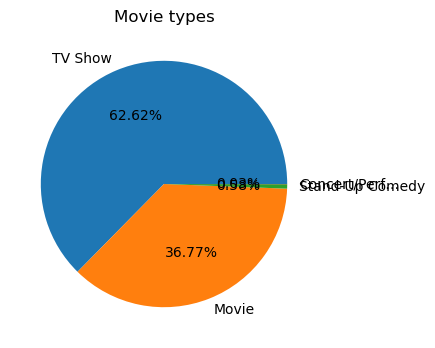

In [46]:
movie_types = df['Type'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(movie_types, labels=movie_types.index, autopct='%1.2f%%')
plt.title('Movie types')
plt.show()

#### Ən çox hansı filmlər ilk 10 film arasına girib?

In [25]:
df['Title'].value_counts().head(10)

Title
Cocomelon               428
Ozark                    85
Cobra Kai                81
Manifest                 80
The Queenâs Gambit     73
Outer Banks              72
Squid Game               66
All American             58
Bridgerton               58
Lucifer                  56
Name: count, dtype: int64

#### İstifadəçi reytinqlərinə görə ən yüksək 10 film hansıdır? Nəticəni vizuallaşdırın

C:\Users\Lala Jafarova\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lala Jafarova\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


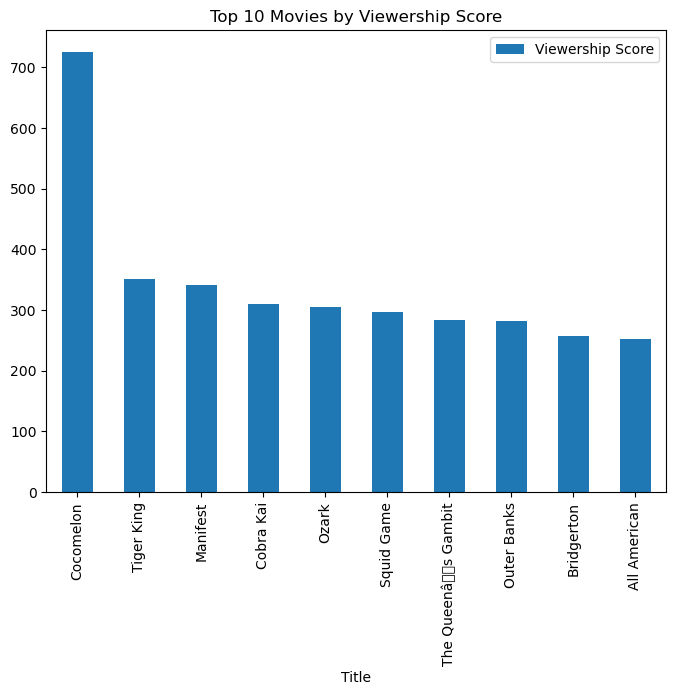

In [50]:
df.groupby('Title')['Viewership Score'].mean().sort_values(ascending = False).head(10)
top10movies = df.groupby('Title')['Viewership Score'].mean().sort_values(ascending = False).head(10)
plt.figure (figsize = (8,6))
top10movies.plot(kind='bar', legend=True)
plt.title('Top 10 Movies by Viewership Score')
plt.show()

#### Ən çox birinci yerdə qalan filmi öyrənmək istəyirəm

In [56]:
first_place = df[df['Rank'] == 1]['Title'].value_counts().idxmax()

print(f'Most first place film: {first_place}')

Most first place film: Cobra Kai


#### Neçə fərqli gün üçün aparılıb bu ölçümlər? Yəni neçə fərqli gün üçün top 10 film göstərilib?

In [60]:
fərqli_gün_sayı=df['As of'].nunique()
print(f'Top 10 filmi {fərqli_gün_sayı} fərqli gün üçün göstərilib')

Top 10 filmi 710 fərqli gün üçün göstərilib


#### Netflix Exclusive filmlər daha yüksək reytinqə sahibdir, yoxsa digərləri?

In [67]:
exc_rating = df[df['Netflix Exclusive'] == 'Yes']['Viewership Score'].mean()
diger = df[df['Netflix Exclusive'] == 'No']['Viewership Score'].mean()

if exc_rating > diger:
    print("Netflix Exclusive films yüksək reytinqə sahibdir.")
elif exc_rating < diger:
    print("diger films yüksək reytinqə sahibdir.")
else:
    print("hamisi yüksək reytinqə sahibdir.")

diger films yüksək reytinqə sahibdir.


#### Mən TV Show və Movie lər üçün aylıq trendi görmək istəyirəm.

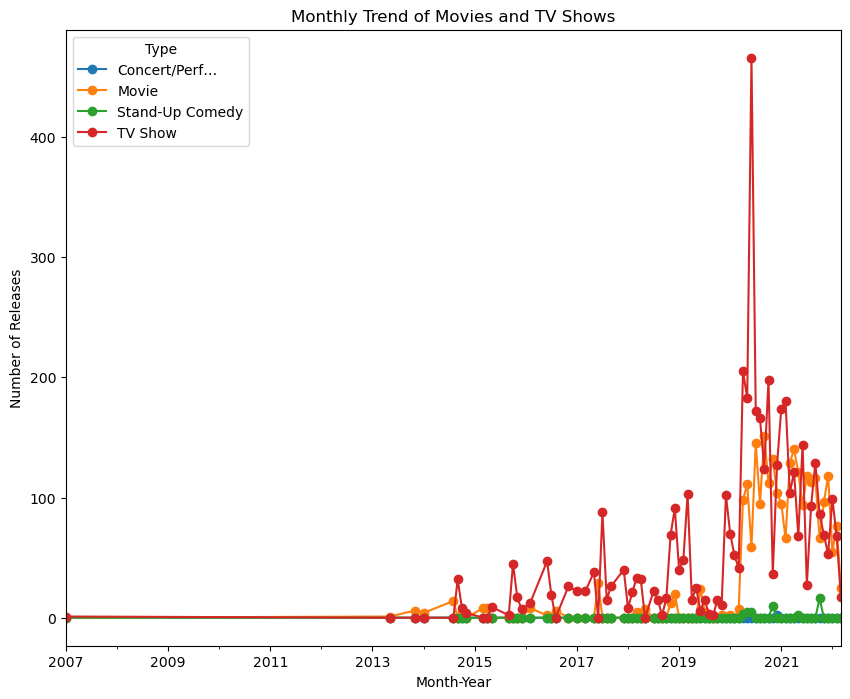

In [69]:
df['month_year'] = df['Netflix Release Date'].dt.to_period('M')
monthly_trend = df.groupby(['month_year', 'Type']).size().unstack(fill_value=0)
monthly_trend.plot(kind='line', marker='o', figsize=(10, 8))

plt.title('Monthly Trend of Movies and TV Shows')
plt.xlabel('Month-Year')
plt.ylabel('Number of Releases')
plt.legend(title='Type')
plt.show()

#### Mən filmin Netflix-də yayınlanma tarixi ilə hər hansı bir korrelyasiyaya sahib olub olmadığını öyrənmək istəyirəm. Bunu həm düsturla, həm də vizualizasiya ilə göstərməlisiniz

Korrelyasiya: -0.03592746637679382


<Figure size 1000x800 with 0 Axes>

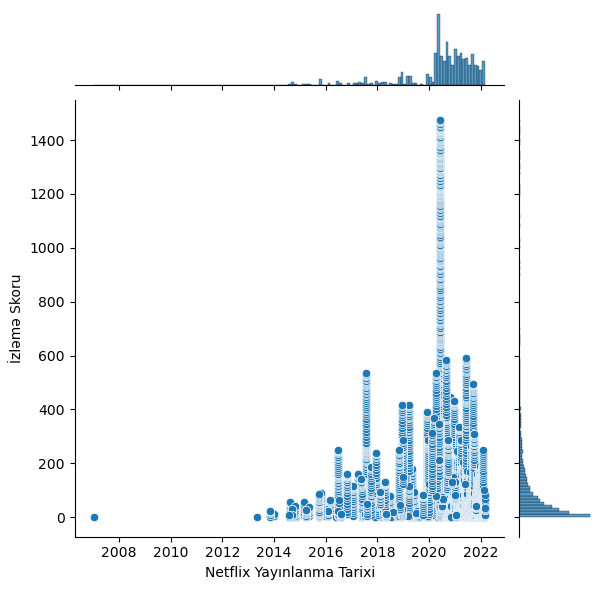

In [105]:
df['Release Date Numeric'] = df['Netflix Release Date'].map(pd.Timestamp.timestamp)
correlation = df[['Release Date Numeric', 'Viewership Score']].corr().iloc[0, 1]
print(f"Korrelyasiya: {correlation}")
plt.figure(figsize=(10, 8))
sns.jointplot(x = 'Netflix Release Date', y = "Viewership Score", data = df, kind = "scatter")
plt.xlabel('Netflix Yayınlanma Tarixi')
plt.ylabel('İzləmə Skoru')
plt.show()

#### Yuxarıdakı xətaya əsasən, aşağıda təkcə illərə görə yeni bir korrelyasiya əmsalı hesablayın

In [94]:
df['Year'] = df['Netflix Release Date'].dt.year
korrelyasiya = df[['Year', 'Viewership Score']].corr().iloc[0, 1]
print(f"İllərə görə korrelyasiya əmsalı: {korrelyasiya}")

İllərə görə korrelyasiya əmsalı: -0.031286205152695166


#### Aylara görə ən məşhur Filmlər hansı olub?

In [83]:
df['Month'] = pd.to_datetime(df['Netflix Release Date']).dt.month

df.groupby('Month')['Title'].agg(lambda x: x.value_counts().index[0])

Month
1            The Circle US
2          Ginny & Georgia
3             All American
4              Outer Banks
5          Sweet Magnolias
6                Cocomelon
7                    Ozark
8                Cobra Kai
9               Squid Game
10    The Queenâs Gambit
11       The Queen of Flow
12              Bridgerton
Name: Title, dtype: object

#### 1/2/3/4 rübdə ən yüksək izləyici reytinqi olan 5 film hansı olub?

In [117]:
top_5_per_week = df.groupby('As of').apply(lambda x: x.nlargest(5, 'Viewership Score'))

print("Top 5 films in 1st quarter:")
print(top_5_per_week.loc['2020-04-01'][['Title', 'Viewership Score']])

print("\nTop 5 films in 2nd quarter:")
print(top_5_per_week.loc['2020-04-08'][['Title', 'Viewership Score']])

print("\nTop 5 films in 3rd quarter:")
print(top_5_per_week.loc['2020-04-15'][['Title', 'Viewership Score']])

print("\nTop 5 films in 4th quarter:")
print(top_5_per_week.loc['2020-04-22'][['Title', 'Viewership Score']])

Top 5 films in 1st quarter:
                          Title  Viewership Score
0  Tiger King: Murder, Mayhem …                90
2                  All American                76
4                  The Platform                55
1                         Ozark                45
7                 Love is Blind                40

Top 5 films in 2nd quarter:
                           Title  Viewership Score
70  Tiger King: Murder, Mayhem …               160
76                  All American               119
71                         Ozark               108
72               Coffee & Kareem                38
75                   Money Heist                32

Top 5 films in 3rd quarter:
                            Title  Viewership Score
140  Tiger King: Murder, Mayhem …               230
141                         Ozark               170
145                  All American               148
144                   Money Heist                72
149              Angel Has Fallen               

C:\Users\Lala Jafarova\AppData\Local\Temp\ipykernel_5512\3839993202.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_week = df.groupby('As of').apply(lambda x: x.nlargest(5, 'Viewership Score'))
